In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Project Description:

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", names=['Id number', 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Type of glass classes(categories):
 building_windows_float_processed,
 building_windows_non_float_processed,
 vehicle_windows_float_processed,
 vehicle_windows_non_float_processed,
 containers,
 tableware,
 headlamps.


In [4]:
df.shape

(214, 11)

There are 214 rows and 11 columns in the dataset.In that 10 are Independent variables and type of glass is target variable.

In [5]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

The columns are Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'

In [9]:
df.nunique()

Id number        214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

These are the unique values present in the dataset. 

In [12]:
for i in df.columns:
    print(df[i].value_counts())

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


This gives the brief information about the dataset.,non-null values,dtype,column names and memory usage.

In [14]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

There are two types of data(int64 and float64) are present in the dataset. 

In [15]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

There are no null values present in the dataset.Let us visualize it by using heatmap.

<AxesSubplot:>

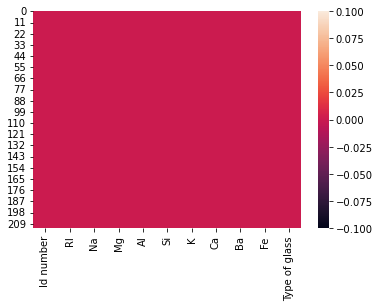

In [17]:
sns.heatmap(df.isnull())

In [21]:
df["Type of glass"].nunique()

6

In [22]:
df["Type of glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

(2,1,7,3,5,6 )six categories are present in Type of glass column.

In [23]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [24]:
df.duplicated().sum()

0

There are no duplicate values in the dataset.

In [6]:
values = {1: 'window glass', 2: 'window glass', 3: 'window glass', 5: 'non-window glass', 6: 'non-window glass', 7: 'non-window glass'}

# create a new column with mapped values
df['Type of glass'] = df['Type of glass'].map(values)


In [7]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,window glass
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,window glass
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,window glass
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,window glass
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,window glass
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,non-window glass
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,non-window glass
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,non-window glass
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,non-window glass


In [8]:
df['Type of glass'].value_counts()

window glass        163
non-window glass     51
Name: Type of glass, dtype: int64

In [30]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass     object
dtype: object

There are three types of data(int64,float64 and object) are present in the dataset.

In [9]:
#Statistical summary of dataset
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


This gives the statistical summary of the numerical columns.The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following:

1)The counts of all the columns are same which means there are no missing values in the dataset.

2)The mean value is greater than the median in Na,Al,Ca,Ba,Fe columns which means the data is skewed to right in these columns

3)The mean value is less than the median in Mg,Si,K columns which means the data is skewed to left in these columns.

4)The mean and median values are same in Id number column and almost same in RI columns which means the data is not skewed in these columns. 

5)By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.

6)we can also notice that the standard deviation, min 25% percentile values from this describe method.

Data Visualization:

window glass        163
non-window glass     51
Name: Type of glass, dtype: int64


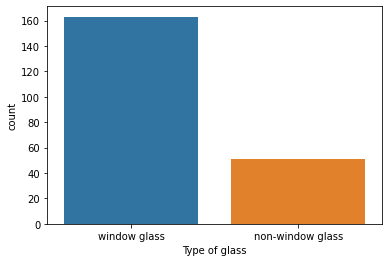

In [32]:
#visualize the Type of glass column
ax=sns.countplot(x="Type of glass",data=df)
print(df['Type of glass'].value_counts())

we can observe that window glass type rate is more than the non-window glass.

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


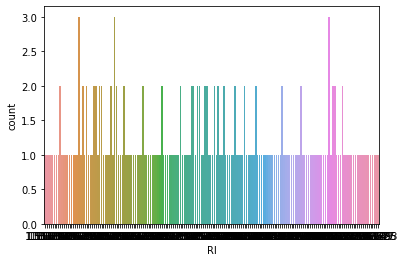

In [33]:
#visualize the RI column
ax=sns.countplot(x="RI",data=df)
print(df['RI'].value_counts())

unique values are less in this column

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


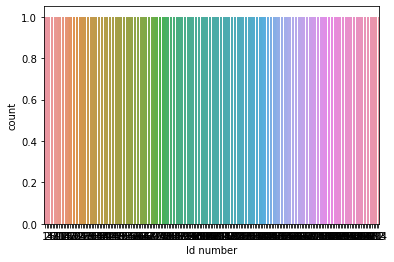

In [34]:
#visualize the Id number column
ax=sns.countplot(x="Id number",data=df)
print(df['Id number'].value_counts())

Id number is unique to every unit in the dataset.

1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


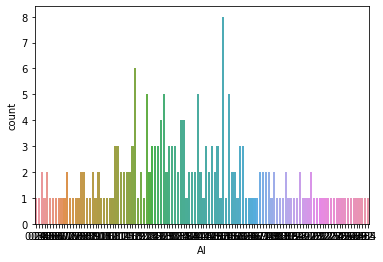

In [35]:
#visualize the Al column
ax=sns.countplot(x="Al",data=df)
print(df['Al'].value_counts())

values of Al greater than 1.2 is more in this column

13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


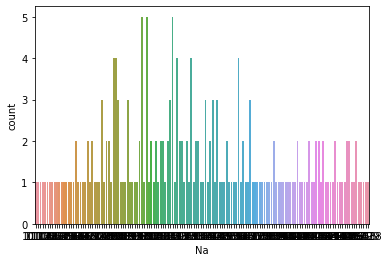

In [10]:
#visualize the Na column
ax=sns.countplot(x="Na",data=df)
print(df['Na'].value_counts())

The values 13.02,13.00, 13.21 occurs more times

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


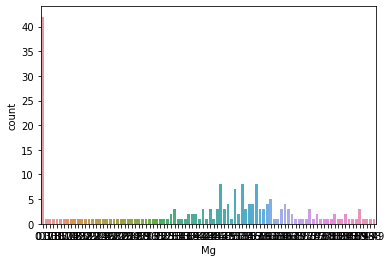

In [11]:
#visualize the Mg column
ax=sns.countplot(x="Mg",data=df)
print(df['Mg'].value_counts())

The value 0.00 occurs more times

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


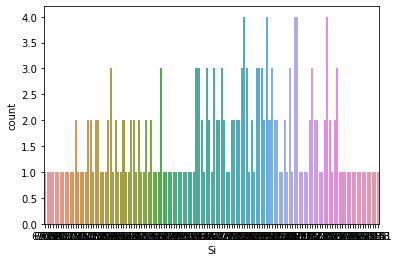

In [12]:
#visualize the Si column
ax=sns.countplot(x="Si",data=df)
print(df['Si'].value_counts())

some values 72.86,72.99,73.10,73.28,73.11 occured more times in this Si column.

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


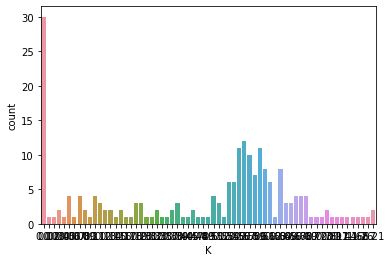

In [13]:
#visualize the K column
ax=sns.countplot(x="K",data=df)
print(df['K'].value_counts())

The value 0.00 occured more times

8.03    5
8.43    5
9.57    4
8.79    4
8.44    4
       ..
9.23    1
8.90    1
9.13    1
8.09    1
8.62    1
Name: Ca, Length: 143, dtype: int64


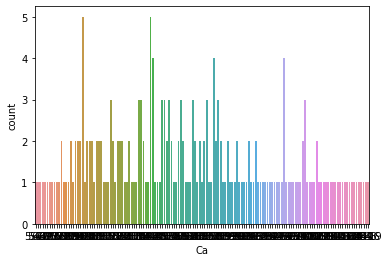

In [17]:
#visualize the Ca column
ax=sns.countplot(x="Ca",data=df)
print(df['Ca'].value_counts())

The occurance of value 8.03 is more in this Ca column.

0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: Ba, dtype: int64


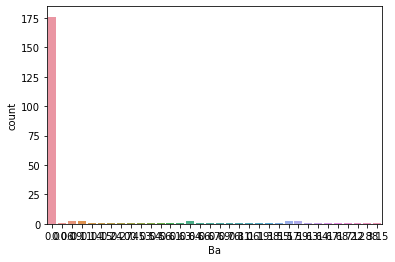

In [15]:
#visualize the Ba column
ax=sns.countplot(x="Ba",data=df)
print(df['Ba'].value_counts())

0.00 value is more in this Ba column.

0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: Fe, dtype: int64


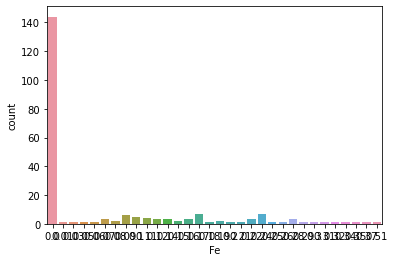

In [16]:
#visualize the Fe column
ax=sns.countplot(x="Fe",data=df)
print(df['Fe'].value_counts())

Here also,0.00 value is more in this Fe column

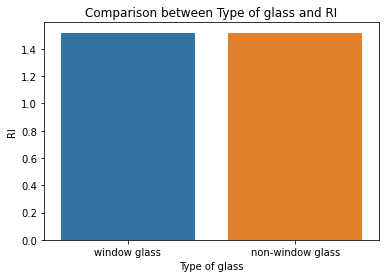

In [22]:
#comparing Type of glass and RI column.
plt.title("Comparison between Type of glass and RI")
sns.barplot(x="Type of glass",y="RI",data=df)
plt.show()

Window glass and non-window glass are same in RI

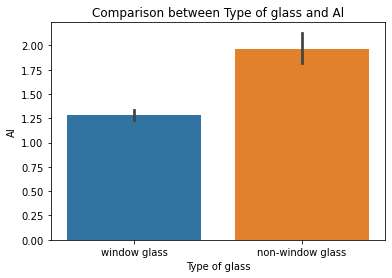

In [23]:
#comparing Type of glass and Al column.
plt.title("Comparison between Type of glass and Al")
sns.barplot(x="Type of glass",y="Al",data=df)
plt.show()

non-window glass type is supported by Al values

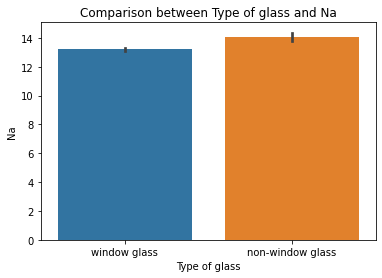

In [24]:
#comparing Type of glass and Na column.
plt.title("Comparison between Type of glass and Na")
sns.barplot(x="Type of glass",y="Na",data=df)
plt.show()

Na is having non-window glass features more

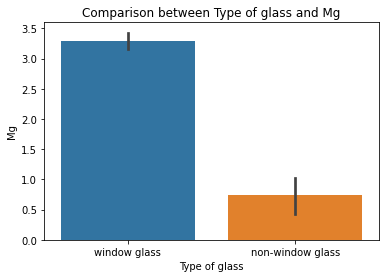

In [25]:
#comparing Type of glass and Mg column.
plt.title("Comparison between Type of glass and Mg")
sns.barplot(x="Type of glass",y="Mg",data=df)
plt.show()

Mg is having window glass type feature more

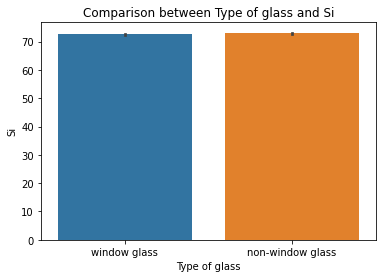

In [26]:
#comparing Type of glass and Si column.
plt.title("Comparison between Type of glass and Si")
sns.barplot(x="Type of glass",y="Si",data=df)
plt.show()

window glass and non-window glass are same in Si column

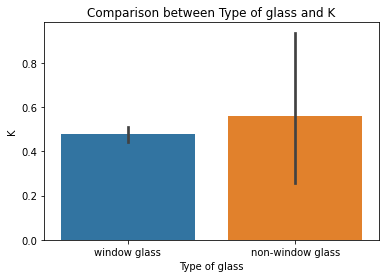

In [27]:
#comparing Type of glass and K column.
plt.title("Comparison between Type of glass and K")
sns.barplot(x="Type of glass",y="K",data=df)
plt.show()

K column supports non-window glass type more

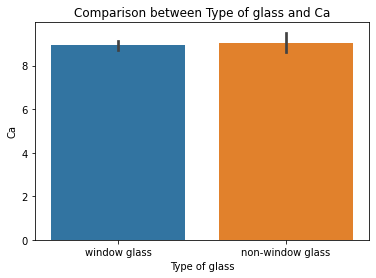

In [28]:
#comparing Type of glass and Ca column.
plt.title("Comparison between Type of glass and Ca")
sns.barplot(x="Type of glass",y="Ca",data=df)
plt.show()

Ca column supports both glass types equally

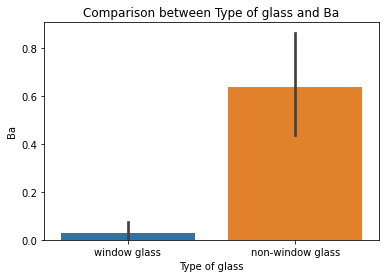

In [29]:
#comparing Type of glass and Ba column.
plt.title("Comparison between Type of glass and Ba")
sns.barplot(x="Type of glass",y="Ba",data=df)
plt.show()

Window glass type is having very less support in Ba column

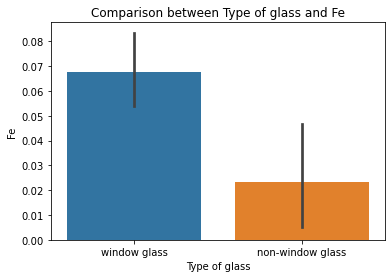

In [30]:
#comparing Type of glass and Fe column.
plt.title("Comparison between Type of glass and Fe")
sns.barplot(x="Type of glass",y="Fe",data=df)
plt.show()

non-window glass type is having less Fe than window glass type.

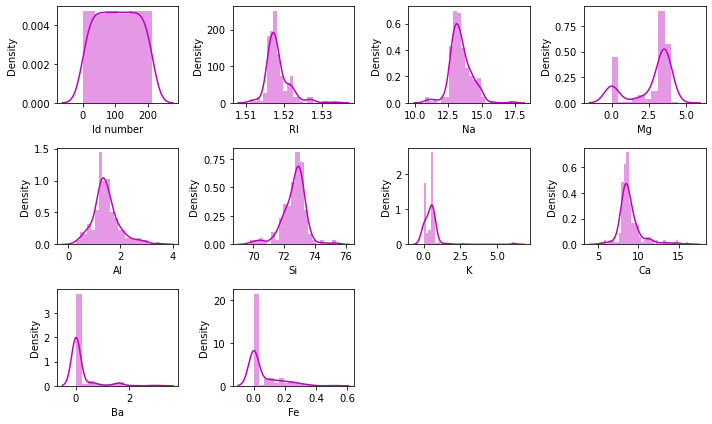

In [33]:
#Let's check how the data has been distributed in all columns.
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for i in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[i],color="m")
        plt.xlabel(i,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()
    

from the above distribution plots,we can see that the data amost looks normal in all the columns except Ca,Ba,Fe,Na,Al columns

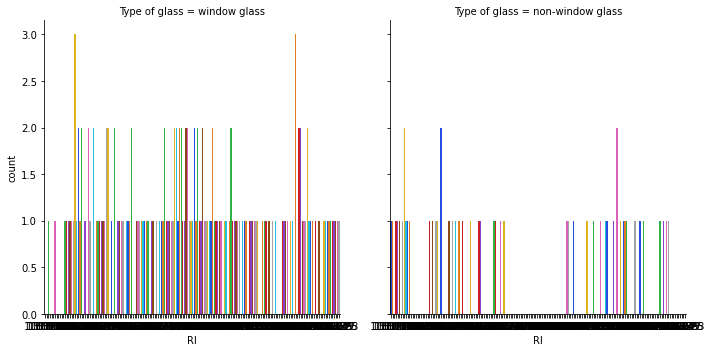

In [34]:
#Let's check Type of glass in RI column
sns.catplot(x="RI",col="Type of glass",palette="bright",kind="count",data=df)
plt.show()

The ratio of window glass and non-window glass is almost same in this RI column

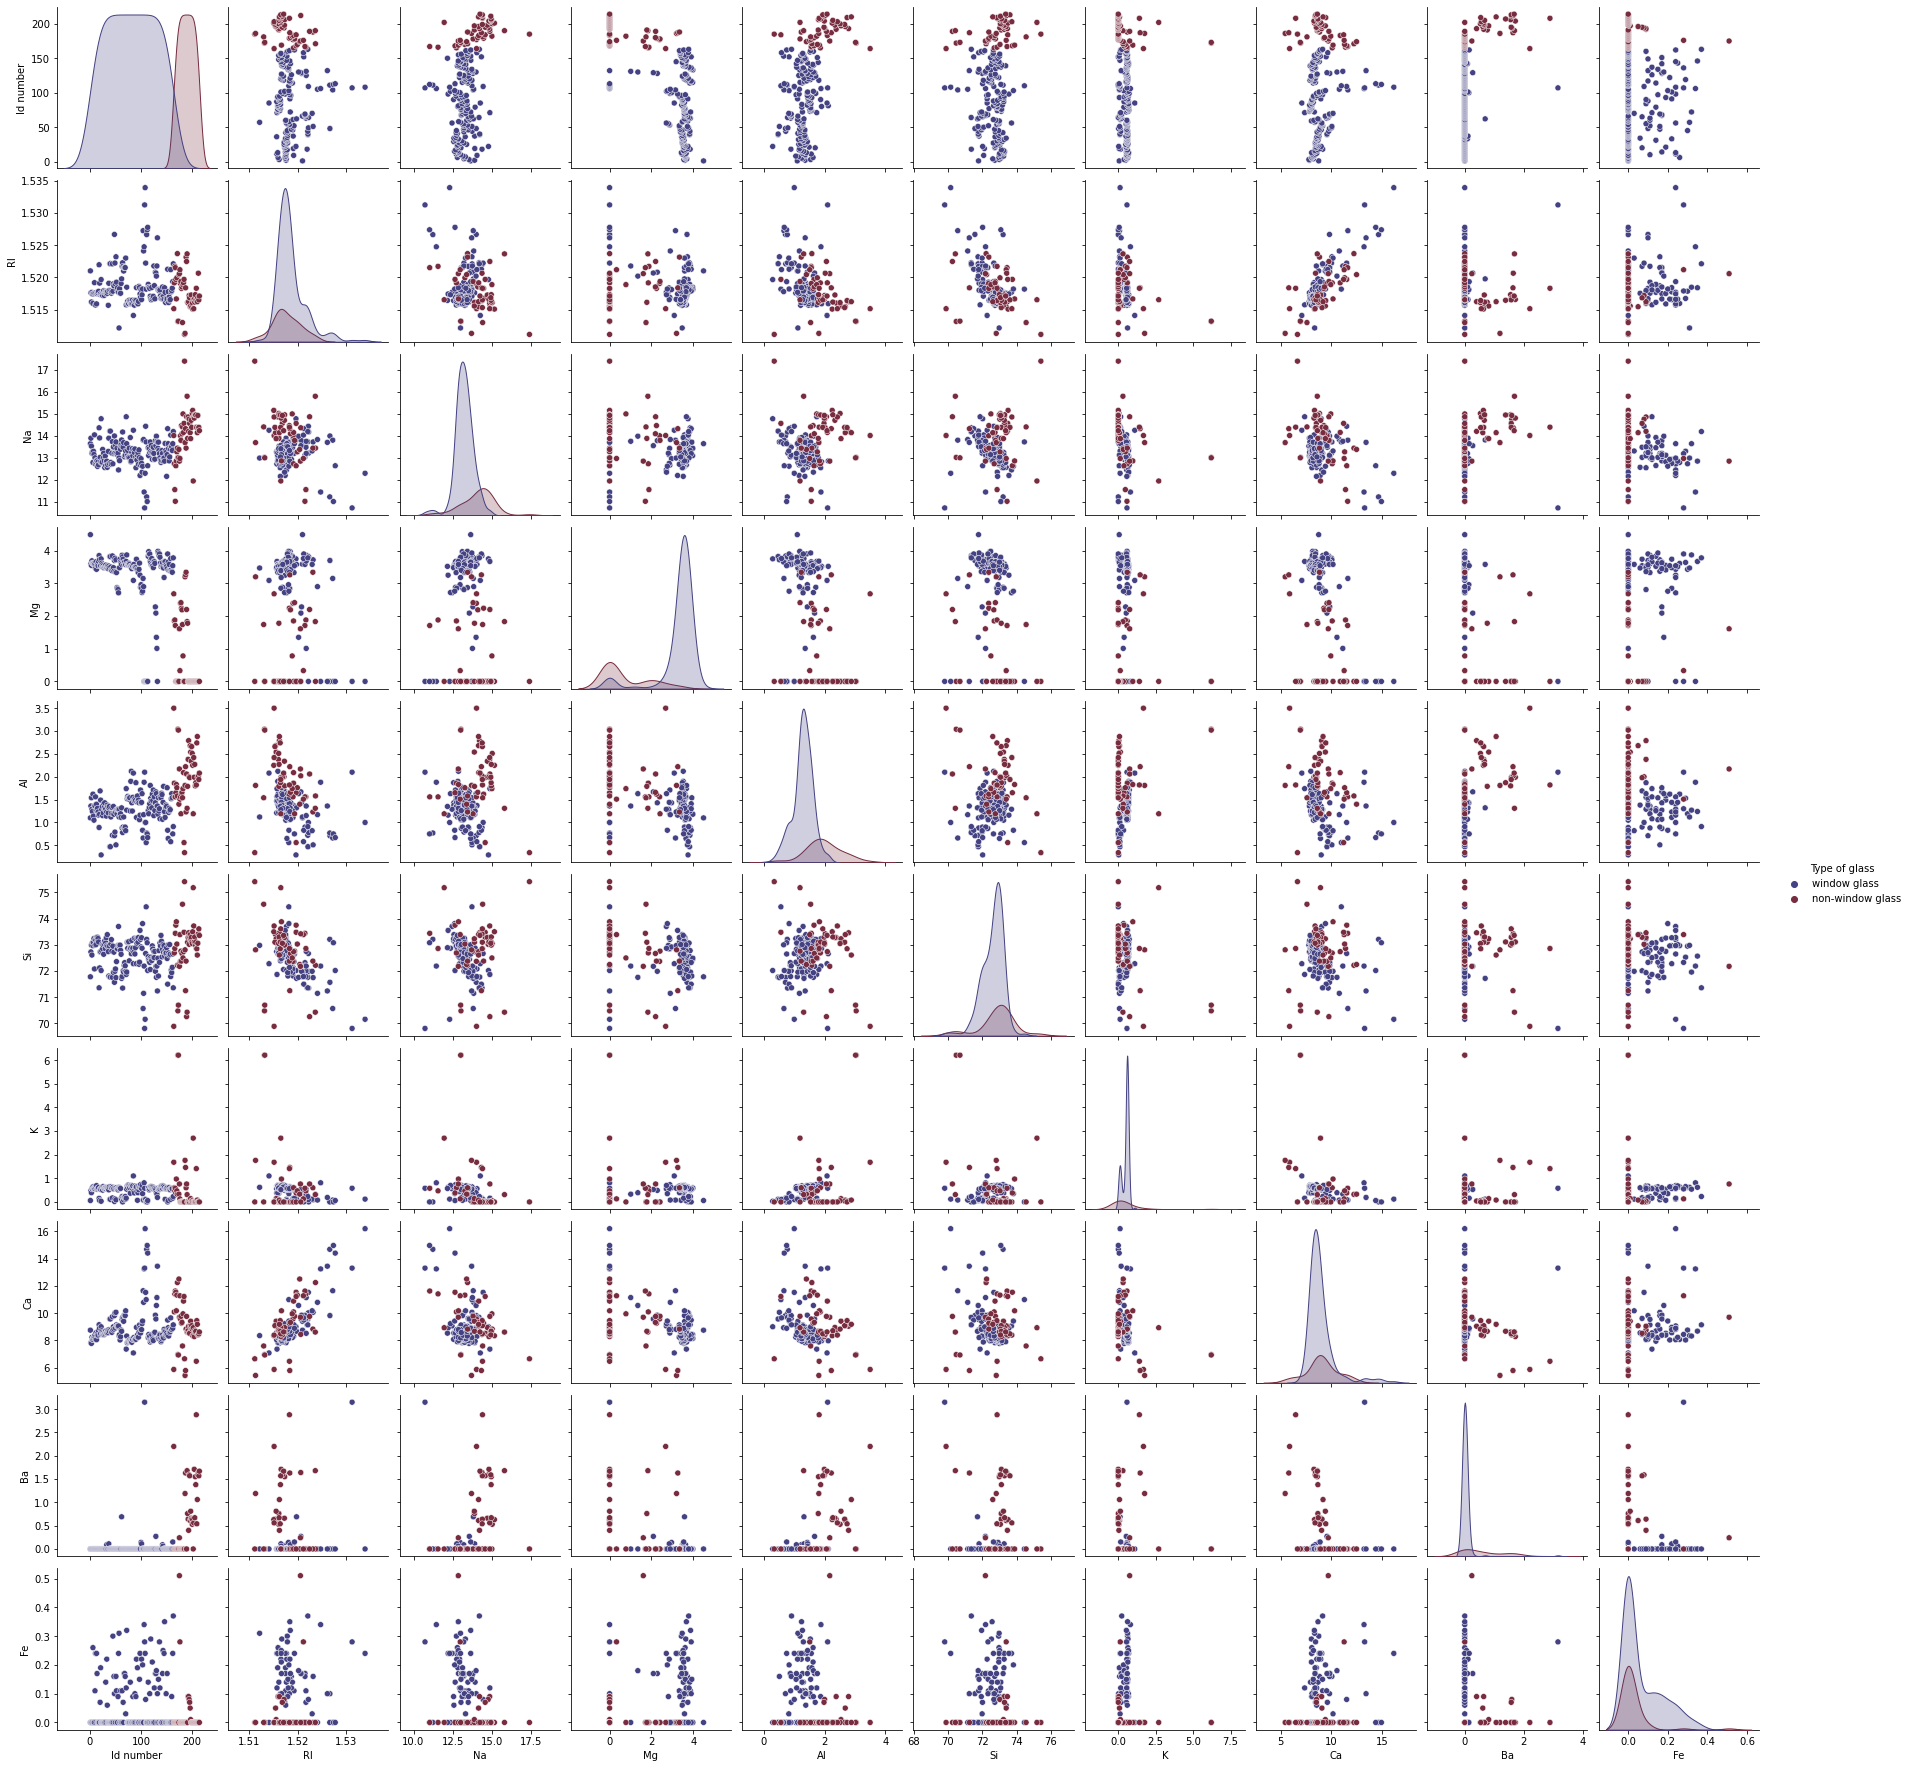

In [35]:
sns.pairplot(df,hue="Type of glass",palette="icefire")
plt.show()

This pair plot gives the pairwise relation between the features on the basis of the target Type of glass.

Checking for outliers:

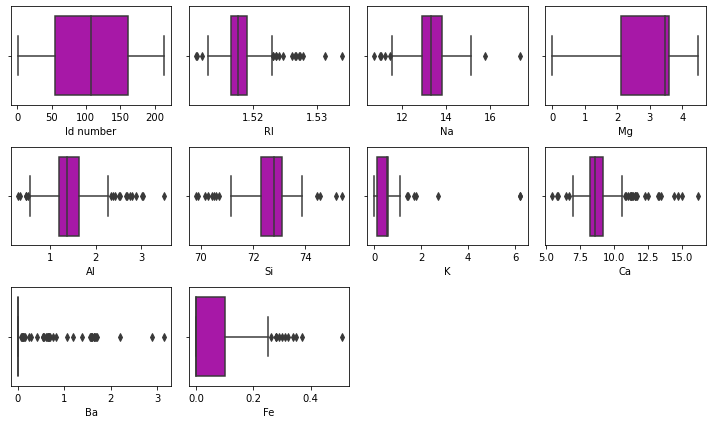

In [37]:
#Let's check the outliers by plotting box plot
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for i in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[i],color="m")
        plt.xlabel(i,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()
    

The columns Id number and Mg columns are not having outliers and remaining all columns are having outliers.

Checking for skewness:

In [38]:
df.skew()

Id number    0.000000
RI           1.625431
Na           0.454181
Mg          -1.152559
Al           0.907290
Si          -0.730447
K            6.551648
Ca           2.047054
Ba           3.416425
Fe           1.754327
dtype: float64

The columns RI,Mg,Al,Si,K,Ca,Ba,Fe columns have skewness.Let us remove skewness using cuberoot method

Removing skewness:

In [39]:
df["RI"]=np.cbrt(df["RI"])
df["Mg"]=np.cbrt(df["Mg"])
df["Al"]=np.cbrt(df["Al"])
df["Si"]=np.cbrt(df["Si"])
df["K"]=np.cbrt(df["K"])
df["Ca"]=np.cbrt(df["Ca"])
df["Ba"]=np.cbrt(df["Ba"])
df["Fe"]=np.cbrt(df["Fe"])

In [40]:
df.skew()

Id number    0.000000
RI           1.617049
Na           0.454181
Mg          -1.440196
Al          -0.204132
Si          -0.776908
K           -0.591896
Ca           1.407358
Ba           2.073007
Fe           0.894683
dtype: float64

we can see the skewness is reduced in some columns and skewness still present in RI,Mg,Si,Ca,Ba columns.

In [47]:
#encoding "Type of glass" column again in to numerical column
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        

In [48]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.150034,13.64,1.649740,1.032280,4.155926,0.391487,2.060643,0.000000,0.0,1.0
1,2,1.149176,13.89,1.532619,1.107932,4.174180,0.782974,1.985732,0.000000,0.0,1.0
2,3,1.148815,13.53,1.525490,1.154800,4.179148,0.730614,1.981496,0.000000,0.0,1.0
3,4,1.149189,13.21,1.545286,1.088587,4.171883,0.829134,2.018168,0.000000,0.0,1.0
4,5,1.149129,13.27,1.535452,1.074337,4.180865,0.819321,2.005816,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.148828,14.14,0.000000,1.422757,4.171883,0.430887,2.093860,1.019613,0.0,0.0
210,211,1.148985,14.92,0.000000,1.257818,4.180484,0.000000,2.032793,1.167165,0.0,0.0
211,212,1.149943,14.36,0.000000,1.264107,4.187339,0.000000,2.036014,1.179274,0.0,0.0
212,213,1.148899,14.38,0.000000,1.247194,4.190948,0.000000,2.039226,1.162251,0.0,0.0


In [49]:
from scipy.stats import zscore
import numpy as np
x=df[["Id number","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]]
z_score=zscore(x)
abs_z_score=np.abs(z_score)
a=((abs_z_score<3).all(axis=1))
df1=df[a]
df1

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.150034,13.64,1.649740,1.032280,4.155926,0.391487,2.060643,0.000000,0.0,1.0
1,2,1.149176,13.89,1.532619,1.107932,4.174180,0.782974,1.985732,0.000000,0.0,1.0
2,3,1.148815,13.53,1.525490,1.154800,4.179148,0.730614,1.981496,0.000000,0.0,1.0
3,4,1.149189,13.21,1.545286,1.088587,4.171883,0.829134,2.018168,0.000000,0.0,1.0
4,5,1.149129,13.27,1.535452,1.074337,4.180865,0.819321,2.005816,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.148828,14.14,0.000000,1.422757,4.171883,0.430887,2.093860,1.019613,0.0,0.0
210,211,1.148985,14.92,0.000000,1.257818,4.180484,0.000000,2.032793,1.167165,0.0,0.0
211,212,1.149943,14.36,0.000000,1.264107,4.187339,0.000000,2.036014,1.179274,0.0,0.0
212,213,1.148899,14.38,0.000000,1.247194,4.190948,0.000000,2.039226,1.162251,0.0,0.0


correlation between independent features and target variable:


In [50]:
#Let's check the correlation between features and target.
df.corr()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,1.000000,-0.072376,0.375722,-0.607398,0.444521,0.059544,-0.343410,0.080554,0.523774,-0.095927,-0.737956
RI,-0.072376,1.000000,-0.191810,-0.113648,-0.418036,-0.542400,-0.211934,0.802869,-0.092651,0.132621,0.134457
Na,0.375722,-0.191810,1.000000,-0.277849,0.077449,-0.070672,-0.539820,-0.264986,0.418626,-0.196921,-0.452336
Mg,-0.607398,-0.113648,-0.277849,1.000000,-0.375748,-0.168940,0.442902,-0.398712,-0.548170,0.094472,0.702022
Al,0.444521,-0.418036,0.077449,-0.375748,1.000000,0.030066,0.119934,-0.287665,0.509187,-0.054623,-0.521192
Si,0.059544,-0.542400,-0.070672,-0.168940,0.030066,1.000000,-0.171894,-0.191018,-0.007427,-0.077870,-0.145719
K,-0.343410,-0.211934,-0.539820,0.442902,0.119934,-0.171894,1.000000,-0.352345,-0.350932,0.119291,0.389353
Ca,0.080554,0.802869,-0.264986,-0.398712,-0.287665,-0.191018,-0.352345,1.000000,-0.148226,0.116880,-0.031986
Ba,0.523774,-0.092651,0.418626,-0.548170,0.509187,-0.007427,-0.350932,-0.148226,1.000000,-0.035721,-0.599029
Fe,-0.095927,0.132621,-0.196921,0.094472,-0.054623,-0.077870,0.119291,0.116880,-0.035721,1.000000,0.220775


This gives the correlation between the dependent and independent variables.we can visualize it by using heatmap.

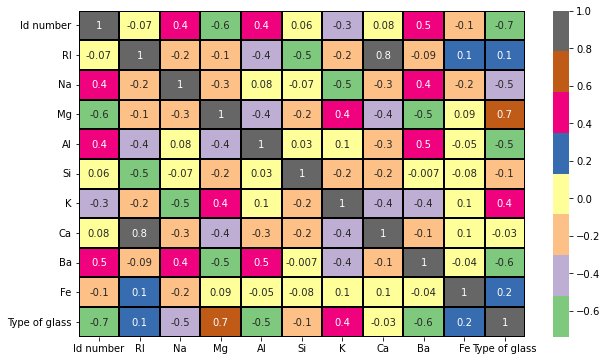

In [51]:
#visualizing the correlation by plotting heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidth=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Accent")
plt.yticks(rotation=0)
plt.show()

This heatmap gives the correlation between the features and target.

There is no much positive relation between the features.

In [52]:
df.corr()["Type of glass"].sort_values(ascending=False)

Type of glass    1.000000
Mg               0.702022
K                0.389353
Fe               0.220775
RI               0.134457
Ca              -0.031986
Si              -0.145719
Na              -0.452336
Al              -0.521192
Ba              -0.599029
Id number       -0.737956
Name: Type of glass, dtype: float64

we can observe the positive and negative correlated features with the target

Visualizing the correlation between features and target using bar plot:

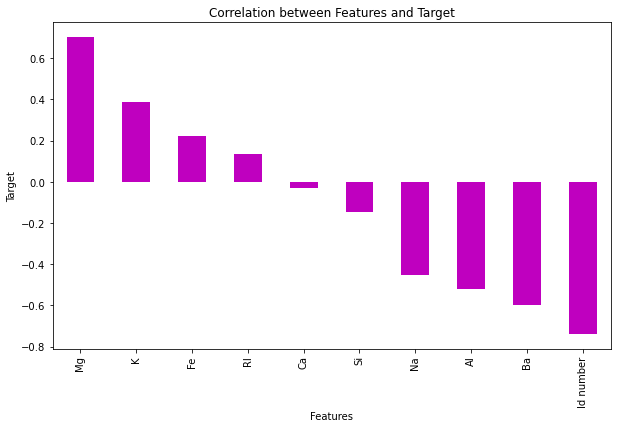

In [53]:
plt.figure(figsize=(10,6))
df.corr()["Type of glass"].sort_values(ascending=False).drop(["Type of glass"]).plot(kind="bar",color="m")
plt.xlabel("Features",fontsize=10)
plt.ylabel("Target",fontsize=10)
plt.title("Correlation between Features and Target")
plt.show()


from the above bar plot we can observe the positive and negative correlated features with the target.

Seperating Features and Label:

In [54]:
x=df.drop("Type of glass",axis=1)
y=df["Type of glass"]

Feature scaling using RobustScaler:

In [55]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-1.000000,1.262923,0.370572,0.539406,-0.645637,-1.255374,-1.224134,0.161162,0.000000,0.0
1,-0.990610,-0.026568,0.643052,0.069148,0.000000,-0.074251,-0.110424,-0.858235,0.000000,0.0
2,-0.981221,-0.569488,0.250681,0.040526,0.399994,0.247209,-0.259376,-0.915876,0.000000,0.0
3,-0.971831,-0.007591,-0.098093,0.120008,-0.165092,-0.222876,0.020896,-0.416842,0.000000,0.0
4,-0.962441,-0.098684,-0.032698,0.080523,-0.286708,0.358306,-0.007021,-0.584921,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
209,0.962441,-0.550499,0.915531,-6.084540,2.686835,-0.222876,-1.112047,0.613182,1.019613,0.0
210,0.971831,-0.315070,1.765668,-6.084540,1.279181,0.333626,-2.337844,-0.217824,1.167165,0.0
211,0.981221,1.126479,1.155313,-6.084540,1.332855,0.777184,-2.337844,-0.173985,1.179274,0.0
212,0.990610,-0.444168,1.177112,-6.084540,1.188512,1.010700,-2.337844,-0.130284,1.162251,0.0


Checking Variance Inflation Factor:

In [56]:
#Finding variance inflation factor in each scaled column. i.e.,vif of x.columns=(1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif


,VIF values,Features
0,1.833745,Id number
1,8.381597,RI
2,3.740488,Na
3,4.766994,Mg
4,2.791595,Al
5,3.118144,Si
6,3.915537,K
7,9.842763,Ca
8,3.912728,Ba
9,1.221799,Fe


By checking vif values,we can observe that the values of Ca and RI are greater than 5,which means they have moderate correlation with target.We will drop one of the column first to reduce multi collinearity problem.

Ca column is having less and negative correlation with target ,and having so many outliers in that column ,and after removing skewness also,still some skewness is present in that column.

In [58]:
x.drop("Ca",axis=1,inplace=True)
x

,Id number,RI,Na,Mg,Al,Si,K,Ba,Fe
0,-1.000000,1.262923,0.370572,0.539406,-0.645637,-1.255374,-1.224134,0.000000,0.0
1,-0.990610,-0.026568,0.643052,0.069148,0.000000,-0.074251,-0.110424,0.000000,0.0
2,-0.981221,-0.569488,0.250681,0.040526,0.399994,0.247209,-0.259376,0.000000,0.0
3,-0.971831,-0.007591,-0.098093,0.120008,-0.165092,-0.222876,0.020896,0.000000,0.0
4,-0.962441,-0.098684,-0.032698,0.080523,-0.286708,0.358306,-0.007021,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.962441,-0.550499,0.915531,-6.084540,2.686835,-0.222876,-1.112047,1.019613,0.0
210,0.971831,-0.315070,1.765668,-6.084540,1.279181,0.333626,-2.337844,1.167165,0.0
211,0.981221,1.126479,1.155313,-6.084540,1.332855,0.777184,-2.337844,1.179274,0.0
212,0.990610,-0.444168,1.177112,-6.084540,1.188512,1.010700,-2.337844,1.162251,0.0


Ca column is having less and negative correlation with target ,and having so many outliers in that column.

In [59]:
#Again check vif values to check multi collinearity
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.776004,Id number
1,4.620358,RI
2,2.925571,Na
3,2.890994,Mg
4,2.786062,Al
5,3.116702,Si
6,3.034942,K
7,2.447312,Ba
8,1.221581,Fe


so,we have solved multi collinearity.Now, we can move ahead for model building.

In [60]:
y.value_counts()

1.0    163
0.0     51
Name: Type of glass, dtype: int64

Here,we can see that the data is not balanced,since it is a classification problem we will balance the data using over sampling method.

In [61]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [62]:
#OverSampling the data
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler()
X,Y=rs.fit_resample(x,y)

In [63]:
#Checking value counts of target column again
Y.value_counts()

1.0    163
0.0    163
Name: Type of glass, dtype: int64

Now the data  is balanced.Now we can move for machine learning classification models.

Modelling:

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
#creating train test split.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=200)

In [66]:
def m_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("Training result")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    else:
         if train==False:
            pred=name.predict(x_test)
            print("\n----Test Result----")
            print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
            print("confusion_matrix:\n\n",confusion_matrix(y_test,pred))
            print("\n Test classification report:\n\n",classification_report(y_test,pred,digits=2))


In [67]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [68]:
#Model initiation for RandomForestClassifier
name=RandomForestClassifier()
name.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
m_score(name,x_train,x_test,y_train,y_test,train=True)
m_score(name,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:100.00%
confusion_matrix:

 [[43  0]
 [ 0 39]]

 Test classification report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



The accuracy score using RandomForestClassifier is 100.00%

Finding the best random state:

In [82]:
mAccuracy=0
mRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=i)
    pred=name.predict(x_test)
    Test_result=accuracy_score(y_test,pred)
    if Test_result>mAccuracy:
        mAccuracy=(Test_result*100)
        mRS=i
print("Best accuracy is",mAccuracy,"% at random state",mRS)    

Best accuracy is 100.0 % at random state 1


In [83]:
#checking cv score for RandomForestClassifier
score=cross_val_score(name,X,Y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score.mean())

[1.  1.  1.  1.  0.8]
0.96
Difference between Accuracy score and cross validation score is: 0.040000000000000036


In [84]:
#Model initiation for SupportVectorMachineClassifier
name1=SVC()
name1.fit(x_train,y_train)

SVC()

In [85]:
m_score(name1,x_train,x_test,y_train,y_test,train=True)
m_score(name1,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:98.77%

----Test Result----
Accuracy score:93.90%
confusion_matrix:

 [[39  4]
 [ 1 38]]

 Test classification report:

               precision    recall  f1-score   support

         0.0       0.97      0.91      0.94        43
         1.0       0.90      0.97      0.94        39

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



The accuracy score using SVC is 93.90%

In [86]:
#checking cv score for SupportVectorMachineClassifier
score1=cross_val_score(name1,X,Y)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score1.mean())

[0.96969697 1.         1.         0.8        0.98461538]
0.9508624708624709
Difference between Accuracy score and cross validation score is: 0.04913752913752911


In [87]:
#Model initiation for GradientBoostingClassifier
name2=GradientBoostingClassifier()
name2.fit(x_train,y_train)

GradientBoostingClassifier()

In [88]:
m_score(name2,x_train,x_test,y_train,y_test,train=True)
m_score(name2,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:100.00%
confusion_matrix:

 [[43  0]
 [ 0 39]]

 Test classification report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



The accuracy score using GradientBoostingClassifier is 100.00%

In [105]:
#checking cv score for GradientBoostingClassifier
score2=cross_val_score(name2,X,Y)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score2.mean())

[1.         1.         1.         1.         0.75384615]
0.9507692307692308
Difference between Accuracy score and cross validation score is: 0.04923076923076919


In [90]:
#Model initiation for AdaBoostClassifier
name3=AdaBoostClassifier()
name3.fit(x_train,y_train)

AdaBoostClassifier()

In [91]:
m_score(name3,x_train,x_test,y_train,y_test,train=True)
m_score(name3,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:100.00%
confusion_matrix:

 [[43  0]
 [ 0 39]]

 Test classification report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



The accuracy score using AdaBoostClassifier is 100.00%

In [104]:
#checking cv score for AdaBoostClassifier
score3=cross_val_score(name3,X,Y)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score3.mean())

[1.         1.         1.         1.         0.75384615]
0.9507692307692308
Difference between Accuracy score and cross validation score is: 0.04923076923076919


In [93]:
#Model initiation for DecisionTreeClassifier
name4=DecisionTreeClassifier()
name4.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
m_score(name4,x_train,x_test,y_train,y_test,train=True)
m_score(name4,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:100.00%
confusion_matrix:

 [[43  0]
 [ 0 39]]

 Test classification report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



The accuracy score using DecisionTreeClassifier is 100.00%

In [103]:
#checking cv score for DecisionTreeClassifier
score4=cross_val_score(name4,X,Y)
print(score4)
print(score4.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score4.mean())

[1.         1.         1.         1.         0.75384615]
0.9507692307692308
Difference between Accuracy score and cross validation score is: 0.04923076923076919


In [96]:
#Model initiation for ExtraTreeClassifier
name5=ExtraTreesClassifier()
name5.fit(x_train,y_train)

ExtraTreesClassifier()

In [97]:
m_score(name5,x_train,x_test,y_train,y_test,train=True)
m_score(name5,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:96.34%
confusion_matrix:

 [[40  3]
 [ 0 39]]

 Test classification report:

               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        43
         1.0       0.93      1.00      0.96        39

    accuracy                           0.96        82
   macro avg       0.96      0.97      0.96        82
weighted avg       0.97      0.96      0.96        82



The accuracy score using ExtraTreesClassifier is 96.34%

In [102]:
#checking cv score for ExtraTreesClassifier
score5=cross_val_score(name5,X,Y)
print(score5)
print(score5.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score5.mean())

[1.         1.         1.         0.96923077 1.        ]
0.9938461538461538
Difference between Accuracy score and cross validation score is: 0.006153846153846176


In [99]:
#Model initiation for BaggingClassifier
name6=BaggingClassifier()
name6.fit(x_train,y_train)

BaggingClassifier()

In [100]:
m_score(name6,x_train,x_test,y_train,y_test,train=True)
m_score(name6,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:100.00%
confusion_matrix:

 [[43  0]
 [ 0 39]]

 Test classification report:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



The accuracy score using BaggingClassifier is 100.00%

In [101]:
#checking cv score for BaggingClassifier
score6=cross_val_score(name6,X,Y)
print(score6)
print(score6.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score6.mean())

[1.         1.         1.         1.         0.75384615]
0.9507692307692308
Difference between Accuracy score and cross validation score is: 0.04923076923076919


ExtraTreesClassifier is our best model as the difference between accuracy score and cv score is least.

ExtraTreesClassifier is our best model.

Hyper Parameter Tuning:

In [106]:
#for ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [107]:
parameters={'criterion':['gini','entropy'],
             'random_state':[10,15],
             'max_depth':range(5,10),
             'n_jobs':range(-2,1),
             'n_estimators':range(50,100)}

In [108]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'n_estimators': range(50, 100), 'n_jobs': range(-2, 1),
                         'random_state': [10, 15]})

In [110]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [111]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth=5,n_estimators=50,n_jobs=-2,random_state=10)
Final_model.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=5, n_estimators=50, n_jobs=-2, random_state=10)

In [112]:
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

100.0


In [113]:
y_test

263    0.0
149    1.0
292    0.0
20     1.0
190    0.0
      ... 
253    0.0
273    0.0
77     1.0
267    0.0
276    0.0
Name: Type of glass, Length: 82, dtype: float64

In [114]:
pred.shape

(82,)

In [115]:
y_test.shape

(82,)

In [116]:
conf_matrix=confusion_matrix(y_test,pred)
conf_matrix

array([[43,  0],
       [ 0, 39]], dtype=int64)

In [117]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve
y_pred=Final_model.predict(x_test)
y_pred

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.])

In [123]:
accuracy=accuracy_score(y_test,y_pred)*100
print("accuracy",accuracy,"%")

accuracy 100.0 %


In [124]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[43,  0],
       [ 0, 39]], dtype=int64)

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        39

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



Threshold= [2. 1. 0.]
True positive rate= [0. 1. 1.]
False positive Rate= [0. 0. 1.]


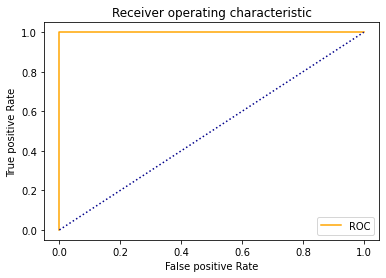

In [126]:
#roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [128]:
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print("AUC_score:",'\n',auc_score*100,"%")

AUC_score: 
 100.0 %


Here we plotted the ROC curve for the final model.The accuracy or AUC_score for the best model is 100.0%

In [129]:
#saving the model
import joblib
joblib.dump(Final_model,"Type_glass_project.pkl")


['Type_glass_project.pkl']

In [130]:
#predicting the saved model
model=joblib.load("Type_glass_project.pkl")
#prediction
prediction=model.predict(x_test)
prediction

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.])

In [131]:
a=np.array(y_test)
df2=pd.DataFrame()
df2['predicted']=prediction
df2["original"]=a
df2    

,predicted,original
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
77,0.0,0.0
78,0.0,0.0
79,1.0,1.0
80,0.0,0.0


Threshold= [2. 1. 0.]
True positive rate= [0. 1. 1.]
False positive Rate= [0. 0. 1.]


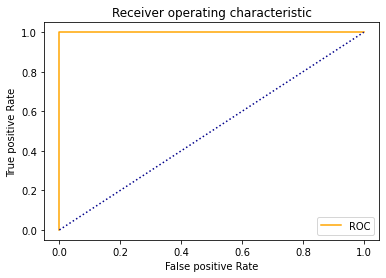

In [132]:
#roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [134]:
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print("AUC_score:",'\n',auc_score*100,"%")

AUC_score: 
 100.0 %


we have plotted the ROC curve for the final model and the AUC score for the best model is 100.00%